In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Customer_churn.csv')
df.sample(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1339,3838-OZURD,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.00,7133.25,Yes
4073,7683-CBDKJ,Male,0,Yes,Yes,14,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,65.45,937.6,Yes
5455,9970-QBCDA,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55,No
4795,6532-YLWSI,Female,0,Yes,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.80,1021.8,Yes
4539,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.4,Yes
3757,4615-PIVVU,Female,0,No,No,42,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),66.50,2762.75,No
3887,4503-BDXBD,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,74.95,815.5,Yes
105,6180-YBIQI,Male,0,No,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,100.2,No


In [3]:
df.drop('customerID', axis='columns', inplace=True) # Dropping the customerID column as it is of no use
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# Dropping the rows whose Totalcharges is null
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [8]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_2039/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Do some visualization

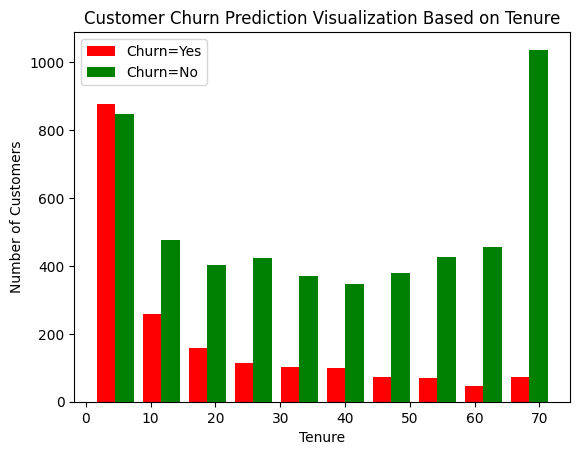

In [11]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization Based on Tenure')
plt.legend()

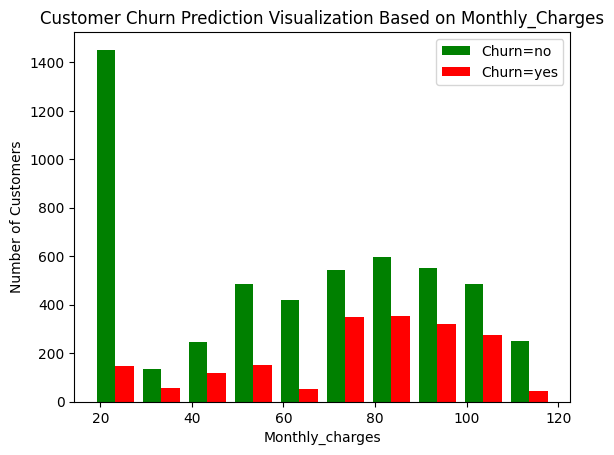

In [12]:
Monthly_charges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
Monthly_charges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([Monthly_charges_churn_no, Monthly_charges_churn_yes], color=['green', 'red'], label=['Churn=no', 'Churn=yes'])
plt.title('Customer Churn Prediction Visualization Based on Monthly_Charges')
plt.xlabel('Monthly_charges')
plt.ylabel('Number of Customers')
plt.legend() 


In [13]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f"{columns} : {df[columns].unique()}")

In [14]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Cleaning the data

In [15]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/tmp/ipykernel_2039/4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/tmp/ipykernel_2039/4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Replacing yes and no to 1 and 0

In [17]:
# Replace yes and no to 1 and 0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

/tmp/ipykernel_2039/2780243192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [18]:
for col in df1:
    print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Replacing Female and Male in the gender column with 1 and 0

In [19]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

/tmp/ipykernel_2039/3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [20]:
df1['gender'].unique()

array([1, 0])

Using One Hot Encoding for Categorical Columns

In [21]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
61,0,0,0,0,60,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2581,0,0,0,0,10,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5375,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
104,0,0,1,0,68,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
4877,1,0,0,0,30,1,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
550,0,0,1,1,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
4776,1,0,1,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5509,1,0,0,1,5,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
696,0,0,1,0,72,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
2970,0,1,0,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

Scaling tenure, MonthlyCharges and TotalCharges columns

In [24]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [25]:
df2.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4928,1,1,1,1,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3208,0,0,1,0,0.661972,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
6949,0,0,1,1,0.436620,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5727,1,0,1,1,0.971831,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3661,1,0,0,0,0.704225,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6052,1,0,1,1,0.563380,1,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
1880,0,0,0,0,0.014085,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [26]:
for col in df2:
    print(f"{col}: {df2[col].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Performing Train_Test Split

In [27]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
import tensorflow as tf 
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

2024-02-02 13:52:47.987640: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 13:52:50.470566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 13:52:50.470672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 13:52:50.827957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 13:52:51.648559: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 13:52:51.649815: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 60)                1260      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


176/176 [==============================] - 1s 1ms/step - loss: 0.5026 - accuracy: 0.7419
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8011
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8039
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8103
E

In [34]:
evaluation_result = model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 879us/step - loss: 0.4526 - accuracy: 0.7839


In [35]:
y_p = model.predict(X_test)
y_p[:5]

44/44 [==============================] - 0s 732us/step


array([[0.09731378],
       [0.45195144],
       [0.650973  ],
       [0.18309304],
       [0.00638063]], dtype=float32)

In [36]:
y_pred = []
for element in y_p:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [37]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [38]:
y_test[:10]

2411    0
5118    0
5724    1
4774    0
1877    0
131     1
5631    0
4028    0
5588    1
3013    0
Name: Churn, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1017
           1       0.65      0.48      0.55       390

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(120.72222222222221, 0.5, 'True')

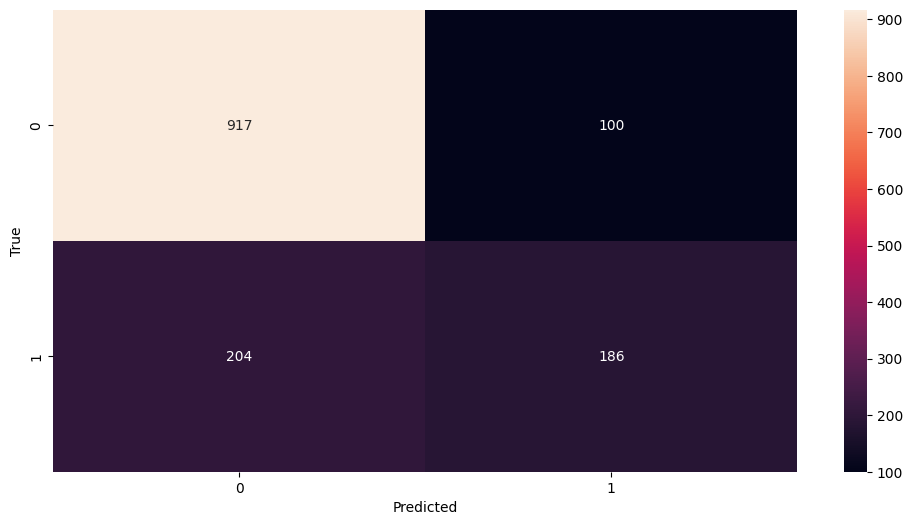

In [40]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(12, 6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [41]:
y_test.shape

(1407,)

In [42]:
# Accuracy
round((894+209)/(894+209+181+123), 2)

0.78

In [43]:
# Precision for customers who did not churn i.e 0
round(894/(894+181), 2)

0.83

In [44]:
# Precision for customers who churned i.e 1
round(209/(209+123), 2)

0.63

In [45]:
# Recall for customers who did not churn i.e 0
round(894/(894+123), 2)

0.88

In [46]:
# Recall for customers who churned i.e 1
round(209/(209+181), 2)

0.54

Saving the model

In [48]:
model.save('model.h5')

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Loading the model

In [49]:
loaded_model = keras.models.load_model('model.h5') 

In [53]:
evaluation_results = loaded_model.evaluate(X_test, y_test)
accuracy = evaluation_results[1]
print(accuracy)

44/44 [==============================] - 0s 861us/step - loss: 0.4526 - accuracy: 0.7839
0.7839374542236328
